In [2]:
import pandas as pd

In [3]:
churn = pd.read_csv("churn-bigml-80.csv")
churn.shape
churn.head()
churn.info()
churn.isna().sum()
churn['Churn'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

Churn
False    2278
True      388
Name: count, dtype: int64

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
cat_cols = churn.select_dtypes(include='object').columns
num_cols = churn.select_dtypes(include=['float64','int64']).columns
num_cols

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

Categorical Columns = ['State', 'International plan', 'Voice mail plan']
Numerical columns = ['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']

Here area code is under Numerical column but columns such as id,code,or labels are to be treated as categories because we won't need to find average or anything.
- So Area code would be a categorical column

In [6]:
pd.crosstab(churn['International plan'], churn['Churn'], normalize='index') *100


Churn,False,True
International plan,,
No,88.731219,11.268781
Yes,56.296296,43.703704


- People with international plan are more likely to churn the reason could be that they were on vacation and no need of furthur use.
- People who do not have international plan have 11% churn rate making them less likely to leave.

In [7]:
churn.groupby('Churn')['Customer service calls'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2278.0,1.453029,1.152125,0.0,1.0,1.0,2.0,7.0
True,388.0,2.206186,1.882536,0.0,1.0,2.0,4.0,9.0


- People with higher churn rate are tend to call more maybe due to bad reception, issues not resolving and dissatisfaction.
- The median and 75th percentile for service calls are roughly double for Churn customers
- Meaning higher service calls signals churn customers.

In [8]:
pd.crosstab(churn['Voice mail plan'], churn['Churn'], normalize = 'index') * 100

Churn,False,True
Voice mail plan,,
No,83.290222,16.709778
Yes,91.132333,8.867667


- People with voice mail plan are less likely to churn.
- Even though people without voice mail plan also are less likely to churn they have higher churn rate roughly double with people who have voice mail plan being 8.8% to 16.7%.
- this suggest the voice mail plan to be a factor of higher customer satisfaction.

In [9]:
churn.groupby('Churn')['Total day minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2278.0,175.104346,50.105334,0.0,142.5,177.90,209.8,313.8
True,388.0,205.181186,68.490213,0.0,150.9,214.95,262.2,350.8


- Total day minutes are significantly higher with churn customers.
- Churn customers minutes increases of average of the non churn customers giving the sign that they might churn due higher bills.

In [10]:
churn.groupby('Churn')['Total night minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2278.0,200.464091,51.284496,43.7,165.825,200.00,235.675,395.0
True,388.0,205.307216,47.565157,47.4,169.925,204.95,241.150,354.9


## Day 1 – Exploratory Data Analysis Summary

- The project focuses on **Customer Churn Prediction**, using a telecom dataset sourced from Kaggle.
- Churn is defined as customers leaving the service, and the objective is to understand which customer behaviors and attributes are associated with higher churn risk.
- The dataset contains **no missing values**, which simplifies preprocessing but still requires careful feature handling.
- Features were categorized into **categorical**, **numerical**, and a binary **target variable (Churn)** to ensure correct preprocessing and modeling later.
- The target variable is **imbalanced**, with significantly fewer churned customers compared to non-churned customers, indicating that accuracy alone will not be a reliable evaluation metric.

### Categorical Feature Insights
- Customers with an **international plan** exhibit substantially higher churn rates.
- Customers with a **voice mail plan** are significantly less likely to churn, suggesting higher engagement or perceived value.

### Numerical Feature Insights
- **Customer service calls** are higher among churned customers, indicating dissatisfaction.
- **Total day minutes** are consistently higher for churned customers across mean, median, and upper percentiles, suggesting heavy usage may correlate with churn risk.

- These observations indicate that both **service usage behavior** and **customer interaction patterns** play an important role in churn and will likely be strong predictors in the modeling phase.


## DAY 2: Goal is to Define the Features and Build  a basline

In [11]:
categorical = ['State', 'International plan', 'Voice mail plan','Area code']
numerical = ['Account length', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']
target='Churn'


In [12]:
x = churn[categorical+numerical]
y = churn[target]

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer( transformers= [('cat', OneHotEncoder(handle_unknown='ignore'),categorical),
                                                 ('num','passthrough',numerical)])

In [15]:
X_test.shape
X_train.shape

(2132, 19)

In [16]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape
X_test_processed.shape

(534, 73)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

basline_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression(max_iter=1000))
])

In [18]:
basline_model.fit(X_train,y_train)

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
y_proba = basline_model.predict_proba(X_test)[:,1]

In [20]:
y_pred = basline_model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test,y_pred))
print("ROC AUC: ", roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

       False       0.88      0.95      0.91       456
        True       0.42      0.21      0.28        78

    accuracy                           0.84       534
   macro avg       0.65      0.58      0.59       534
weighted avg       0.81      0.84      0.82       534

ROC AUC:  0.7318094916779126


Day 3

In [22]:
log_reg = basline_model.named_steps['classifier']
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

feature_names = basline_model.named_steps['preprocessor'].get_feature_names_out()

coef_df = pd.DataFrame({
    "feature":feature_names,
    "coefficients": coefficients
}).sort_values(by="coefficients",ascending=False)

coef_df.head()

,feature,coefficients
43,cat__State_TX,1.451595
22,cat__State_MI,0.824626
31,cat__State_NJ,0.824149
26,cat__State_MT,0.780914
40,cat__State_SC,0.780181


In [23]:
coef_df.tail()

,feature,coefficients
45,cat__State_VA,-0.886377
39,cat__State_RI,-0.922770
54,cat__Voice mail plan_Yes,-0.963224
53,cat__Voice mail plan_No,-1.190073
51,cat__International plan_No,-2.212987


In [24]:
import numpy as np

threshold = 0.3
y_proba_30 = (y_proba >= threshold).astype(int)


In [25]:
print(classification_report(y_test,y_proba_30))

              precision    recall  f1-score   support

       False       0.89      0.88      0.89       456
        True       0.35      0.38      0.37        78

    accuracy                           0.81       534
   macro avg       0.62      0.63      0.63       534
weighted avg       0.81      0.81      0.81       534



In [26]:
for threshold in [0.4, 0.3, 0.2]:
    y_proba_loop = (y_proba >= threshold).astype(int)
    print("\nThreshold =",threshold)
    print(classification_report(y_test,y_proba_loop))


Threshold = 0.4
              precision    recall  f1-score   support

       False       0.88      0.92      0.90       456
        True       0.40      0.29      0.34        78

    accuracy                           0.83       534
   macro avg       0.64      0.61      0.62       534
weighted avg       0.81      0.83      0.82       534


Threshold = 0.3
              precision    recall  f1-score   support

       False       0.89      0.88      0.89       456
        True       0.35      0.38      0.37        78

    accuracy                           0.81       534
   macro avg       0.62      0.63      0.63       534
weighted avg       0.81      0.81      0.81       534


Threshold = 0.2
              precision    recall  f1-score   support

       False       0.92      0.82      0.86       456
        True       0.35      0.58      0.43        78

    accuracy                           0.78       534
   macro avg       0.63      0.70      0.65       534
weighted avg       0.84

In [27]:
threshold = 0.2
y_proba_20 = (y_proba>=threshold).astype(int)

print(classification_report(y_test,y_proba_20))

              precision    recall  f1-score   support

       False       0.92      0.82      0.86       456
        True       0.35      0.58      0.43        78

    accuracy                           0.78       534
   macro avg       0.63      0.70      0.65       534
weighted avg       0.84      0.78      0.80       534



D 4: Making the weights balanced so that the model knows that churn mistakes are more critical than non churn mistakes.
Because right now there more non churn than churn classes which makes the model think that non churners are more important.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

balanced_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [29]:
balanced_model.fit(X_train,y_train)
y_proba_bal = balanced_model.predict_proba(X_test)[:,1]

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_pred_50 = (y_proba_bal >= 0.5).astype(int)
y_pred_30 = (y_proba_bal >=0.5).astype(int)

In [31]:
from sklearn.metrics import classification_report
print("threshold 0.5\n")
print(classification_report(y_test,y_pred_50))
print("Threshold 0.3\n")
print(classification_report(y_test,y_pred_30))

threshold 0.5

              precision    recall  f1-score   support

       False       0.92      0.77      0.84       456
        True       0.31      0.62      0.41        78

    accuracy                           0.74       534
   macro avg       0.62      0.69      0.62       534
weighted avg       0.83      0.74      0.77       534

Threshold 0.3

              precision    recall  f1-score   support

       False       0.92      0.77      0.84       456
        True       0.31      0.62      0.41        78

    accuracy                           0.74       534
   macro avg       0.62      0.69      0.62       534
weighted avg       0.83      0.74      0.77       534



## LOGISTIC REGRESSION (Baseline): Summary
- Used logistic regression as the base model because it was easy to interpret and suitable for binary classification with being a good starting point for churn prediction or tabular dataset.
- Used  preprocessing pipeline with one-hot encoding for categorical features and numerical features were passed through to avoid data leakage.
- The initial baseline model at default threshold showed high overall accuracy but low recall and slightely higher precision than recall due to the class imbalance.
- Threshold tuning improved the recall by adjusting the decision boudary (0.3, 0.2), at the cost of precision (higher False Negatives).
- To address the imbalance during training, class weight was balanced (class_weight = 'balanced').
- The balanced class model significantly improved churn recall while maintaining reasonable precision even at the default threshold.
- This showcases that handling the class imbalance at the training or learning stage is more effective than threshold tuining alone.


# Now Using the Decision Tree to See how it predicts.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

tree_Model = Pipeline(steps=(
    ('preprocessor',preprocessor),
    ('classifier',DecisionTreeClassifier(random_state=42))
))
tree_Model.fit(X_train,y_train)
y_proba_tree = tree_Model.predict_proba(X_test)[:,1]

In [33]:
y_pred_tree = (y_proba_tree>=0.5).astype(int)

In [34]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test,y_pred_tree))
print("ROC-AUC: ", roc_auc_score(y_test,y_proba_tree))

              precision    recall  f1-score   support

       False       0.94      0.96      0.95       456
        True       0.73      0.65      0.69        78

    accuracy                           0.91       534
   macro avg       0.84      0.81      0.82       534
weighted avg       0.91      0.91      0.91       534

ROC-AUC:  0.8060897435897435


In [35]:
tree_model_DepthC = Pipeline(steps=(
    ('preprocessor',preprocessor),
    ('classifier',DecisionTreeClassifier(max_depth=5, random_state=42))
))
tree_model_DepthC.fit(X_train,y_train)
y_proba_tree_DepthC = tree_model_DepthC.predict_proba(X_test)[:,1]

In [36]:
y_pred_tree_DepthC = (y_proba_tree_DepthC >= 0.5).astype(int)

In [37]:
print(classification_report(y_test,y_pred_tree_DepthC))
print("ROC-AUC: ",roc_auc_score(y_test,y_proba_tree_DepthC))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95       456
        True       0.80      0.60      0.69        78

    accuracy                           0.92       534
   macro avg       0.87      0.79      0.82       534
weighted avg       0.91      0.92      0.91       534

ROC-AUC:  0.8400387989203778


## Confusion Matrix to Finally decide which model would be best to choose.(I guess DT)

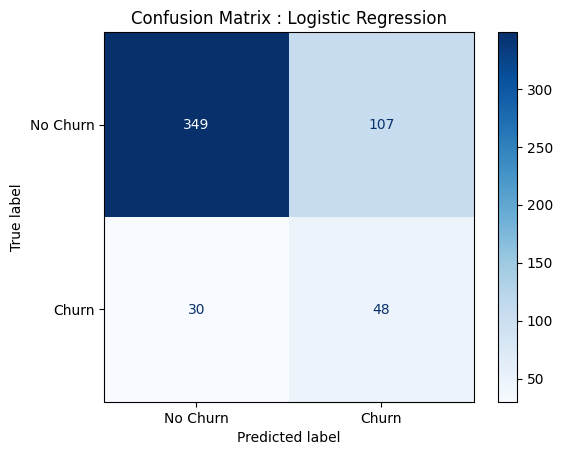

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred_lr = y_pred_50 # the balanced logistic model with defualt threshold 0.5

cm_lr = confusion_matrix(y_test,y_pred_lr)

display_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["No Churn","Churn"])

display_lr.plot(cmap='Blues')
plt.title("Confusion Matrix : Logistic Regression")
plt.show()


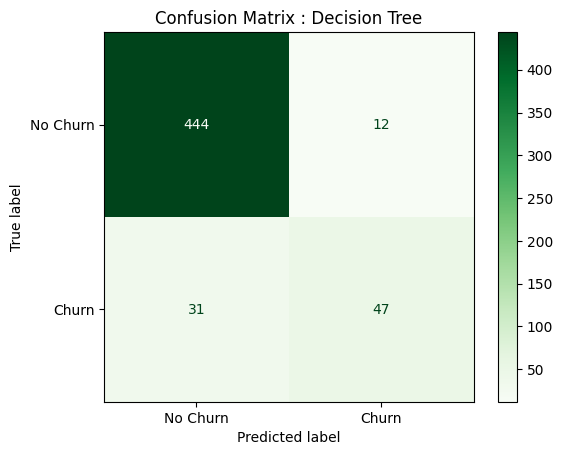

In [43]:
y_pred_dt = y_pred_tree_DepthC 
cm_dt = confusion_matrix(y_test,y_pred_dt)

display_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=["No Churn","Churn"])

display_dt.plot(cmap="Greens")
plt.title("Confusion Matrix : Decision Tree")
plt.show()

## Final Model Summary

- Both Logistic Regression and Decision Tree models identify a similar number of churn customers, achieving comparable recall (~0.60).
- The Decision Tree produces **significantly fewer false positives** compared to Logistic Regression (12 vs 107), while maintaining similar churn detection capability.
- As a result, the Decision Tree achieves **much higher precision** for the churn class (0.80 vs 0.31), meaning far fewer loyal customers are incorrectly flagged as churners.
- This leads to a **substantially lower operational cost**, as fewer unnecessary retention actions are triggered.
- Given its superior precision, strong recall, and higher ROC-AUC, the **Decision Tree is selected as the final model** for churn prediction.


## Business Interpretation

The final Decision Tree model enables proactive churn prevention by accurately identifying customers at risk of leaving while minimizing unnecessary interventions. This balance allows the business to allocate retention resources more efficiently and focus efforts on customers most likely to churn.


## Limitations

- The model was trained on historical customer data and may not capture future behavioral shifts.
- A single Decision Tree, while interpretable, may be sensitive to data variations.

